# ANALISIS FORECAST - Sesión 01


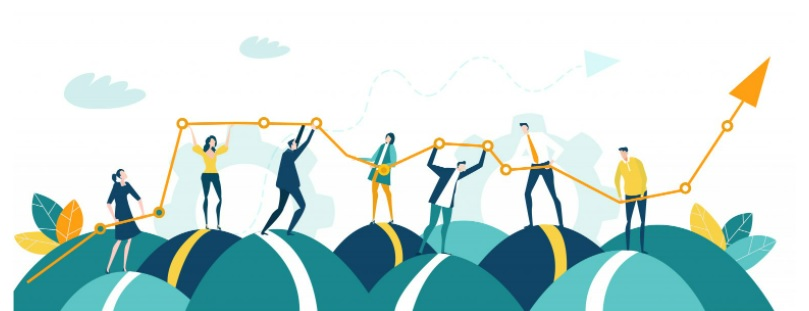

**Importamos los módulos necesarios**

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

**Leemos nuestra serie de tiempo desde un archvo csv**

In [ ]:
# Importar datos en formato csv.
pasajeros = pd.read_csv('datos/pasajeros.csv',encoding='latin-1', sep = ';',parse_dates = ['fecha'], dayfirst = True) # a veces los datos no se cargan bien

In [ ]:
pasajeros.head(3)

,Unnamed: 0,x,fecha
0,1,112,1949-01-01
1,2,118,1949-02-01
2,3,132,1949-03-01


In [ ]:
pasajeros.dtypes

Unnamed: 0             int64
x                      int64
fecha         datetime64[ns]
dtype: object

In [ ]:
# Asignando fecha como index 
pasajeros.set_index('fecha',inplace = True)

In [ ]:
pasajeros.head(5)

,Unnamed: 0,x
fecha,,
1949-01-01,1,112
1949-02-01,2,118
1949-03-01,3,132
1949-04-01,4,129
1949-05-01,5,121


**Graficamos la serie de tiempo**

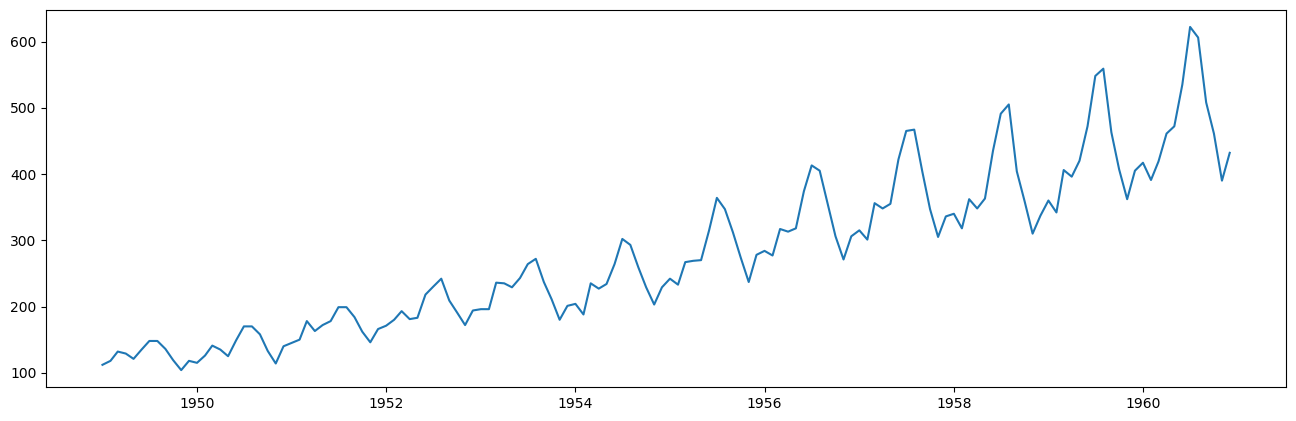

In [ ]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(pasajeros.x,color='tab:blue')
plt.show()

**DESCOMPOSICIÓN DE UNA SERIE DE TIEMPO**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

**Métodos de Descomposición**

In [ ]:
# Multiplicative Decomposition
#=============================
result_mul = seasonal_decompose(pasajeros['x'],model = 'multiplicative',freq = 12)
# Additive Decomposition
#=============================
result_add = seasonal_decompose(pasajeros['x'],model = 'additive',freq = 12)

C:\Users\Administrativo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Administrativo\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  import sys


**Graficamos las componentes por método multiplicativo**

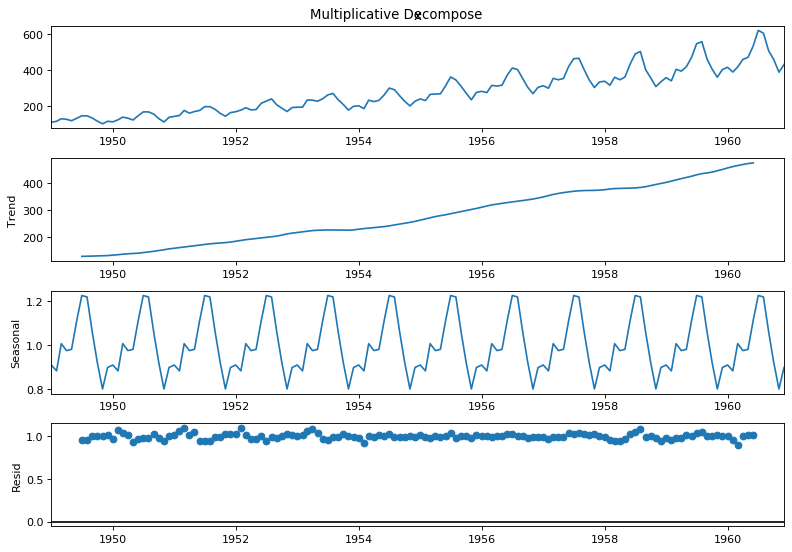

In [ ]:
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 80})
result_mul.plot().suptitle('Multiplicative Decompose',fontsize = 12)
plt.show()

**Extraemos los resultados de la descomposición en un marco de datos**

In [ ]:
#Guardando en DataFrame nuestro set de datos de la descomposicion de la serie de tiempo
df_reconstructed = pd.concat([result_mul.seasonal,result_mul.trend,result_mul.resid,result_mul.observed],axis = 1)
df_reconstructed.columns = ['estacion','tendencia','residuales','observaciones']
df_reconstructed.head(20)

,estacion,tendencia,residuales,observaciones
fecha,,,,
1949-01-01,0.910230,NaN,NaN,112.0
1949-02-01,0.883625,NaN,NaN,118.0
1949-03-01,1.007366,NaN,NaN,132.0
1949-04-01,0.975906,NaN,NaN,129.0
1949-05-01,0.981378,NaN,NaN,121.0
1949-06-01,1.112776,NaN,NaN,135.0
1949-07-01,1.226556,126.791667,0.951664,148.0
1949-08-01,1.219911,127.250000,0.953401,148.0
1949-09-01,1.060492,127.958333,1.002220,136.0
